In [58]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

# Business Problem Understanding : Can we predict a student's chance of admission to a university based on their academic scores and other factors?

**Explanation:**

Universities and students both want to understand the key factors that influence admission chances. By analyzing this dataset, we can:

- Identify which factors (GRE, TOEFL, CGPA, SOP, LOR, etc.) impact admission the most.
- Develop a model to predict the likelihood of admission for a student.
- Help students improve their profiles by focusing on the most important criteria.
- Assist universities in automating and refining their admission process.

**Explanation of Each Column**

**Serial No.**

- Just a unique number for each student in the dataset (not useful for analysis).

**GRE Score**

- The student's score on the Graduate Record Examination (GRE), which is an important test for university admissions.
- Higher scores usually improve the chance of admission.

**TOEFL Score**

- The student's score on the Test of English as a Foreign Language (TOEFL), which measures English proficiency.
- A high TOEFL score helps in getting admission, especially for non-native English speakers.

**University Rating**

- A rating of the university (1 to 5), where 5 = top university and 1 = lower-ranked university.
- Higher-rated universities might have stricter admission requirements.

**SOP (Statement of Purpose Strength)**

- A score (1 to 5) representing how strong the student’s Statement of Purpose is.
- A well-written SOP can improve admission chances.

**LOR (Letter of Recommendation Strength)**

- A score (1 to 5) showing how strong the letters of recommendation are.
- Strong recommendations from professors or professionals increase chances of admission.

**CGPA (Cumulative Grade Point Average)**

 - The student’s overall academic performance (on a scale of 10).
- Higher CGPA usually leads to a higher chance of admission.

**Research**

- **1** = Student has research experience
- **0** = No research experience
- Research experience can be an advantage for admission, especially for top universities.

**Chance of Admit**

- A probability (between 0 and 1) representing how likely the student is to get admitted.
- Closer to 1 = Higher chance of admission.

In [59]:
df = pd.read_csv(r"C:\Users\SHRI\OneDrive\Desktop\DataScience_DataFiles\srk_sir_datasets\admission_predict.csv")

In [60]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [61]:
df.shape

(500, 9)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


- Total Entries: The dataset contains 500 students' records, each representing an application.
- No Missing Values: All columns have 500 non-null values, meaning there is no missing data.

Data Types:

- Integer Columns (int64): Serial No., GRE Score, TOEFL Score, University Rating, Research.
- Float Columns (float64): SOP, LOR, CGPA, Chance of Admit.

Key Features:

- GRE Score, TOEFL Score, CGPA are continuous numerical values, which might strongly influence admission chances.
- University Rating, SOP, LOR, Research are categorical or ordinal factors that can also impact admission.
- Target Variable: "Chance of Admit" 

In [63]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

# Exploratory data analysis

In [64]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [65]:
d = df.nunique()
d 

Serial No.           500
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [66]:
df = df.drop(columns = ['Serial No.'])

In [67]:
for i in df:
    print(i , ' : ', df[i].unique())
    print("==========================================")

GRE Score  :  [337 324 316 322 314 330 321 308 302 323 325 327 328 307 311 317 319 318
 303 312 334 336 340 298 295 310 300 338 331 320 299 304 313 332 326 329
 339 309 315 301 296 294 306 305 290 335 333 297 293]
TOEFL Score  :  [118 107 104 110 103 115 109 101 102 108 106 111 112 105 114 116 119 120
  98  93  99  97 117 113 100  95  96  94  92]
University Rating  :  [4 3 2 5 1]
SOP  :  [4.5 4.  3.  3.5 2.  5.  1.5 1.  2.5]
LOR   :  [4.5 3.5 2.5 3.  4.  1.5 2.  5.  1. ]
CGPA  :  [9.65 8.87 8.   8.67 8.21 9.34 8.2  7.9  8.6  8.4  9.   9.1  8.3  8.7
 8.8  8.5  9.5  9.7  9.8  9.6  7.5  7.2  7.3  8.1  9.4  9.2  7.8  7.7
 9.3  8.85 7.4  7.6  6.8  8.92 9.02 8.64 9.22 9.16 9.64 9.76 9.45 9.04
 8.9  8.56 8.72 8.22 7.54 7.36 8.02 9.36 8.66 8.42 8.28 8.14 8.76 7.92
 7.66 8.03 7.88 7.84 8.96 9.24 8.88 8.46 8.12 8.25 8.47 9.05 8.78 9.18
 9.46 9.38 8.48 8.68 8.34 8.45 8.62 7.46 7.28 8.84 9.56 9.48 8.36 9.32
 8.71 9.35 8.65 9.28 8.77 8.16 9.08 9.12 9.15 9.44 9.92 9.11 8.26 9.43
 9.06 8.75 8.89 8.69

In [68]:
df.columns.tolist()

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

**columns are not given in correct syntax i have to correct that**

In [69]:
df.columns = ['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 
              'CGPA', 'Research', 'Chance_of_Admit']
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [70]:
continous = ['GRE_Score', 'TOEFL_Score', 'CGPA', 'Chance_of_Admit']

discrete_count = ['University_Rating', 'SOP', 'LOR', 'Research']

In [71]:
df[continous].describe()

,GRE_Score,TOEFL_Score,CGPA,Chance_of_Admit
count,500.000000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,8.576440,0.72174
std,11.295148,6.081868,0.604813,0.14114
min,290.000000,92.000000,6.800000,0.34000
25%,308.000000,103.000000,8.127500,0.63000
50%,317.000000,107.000000,8.560000,0.72000
75%,325.000000,112.000000,9.040000,0.82000
max,340.000000,120.000000,9.920000,0.97000


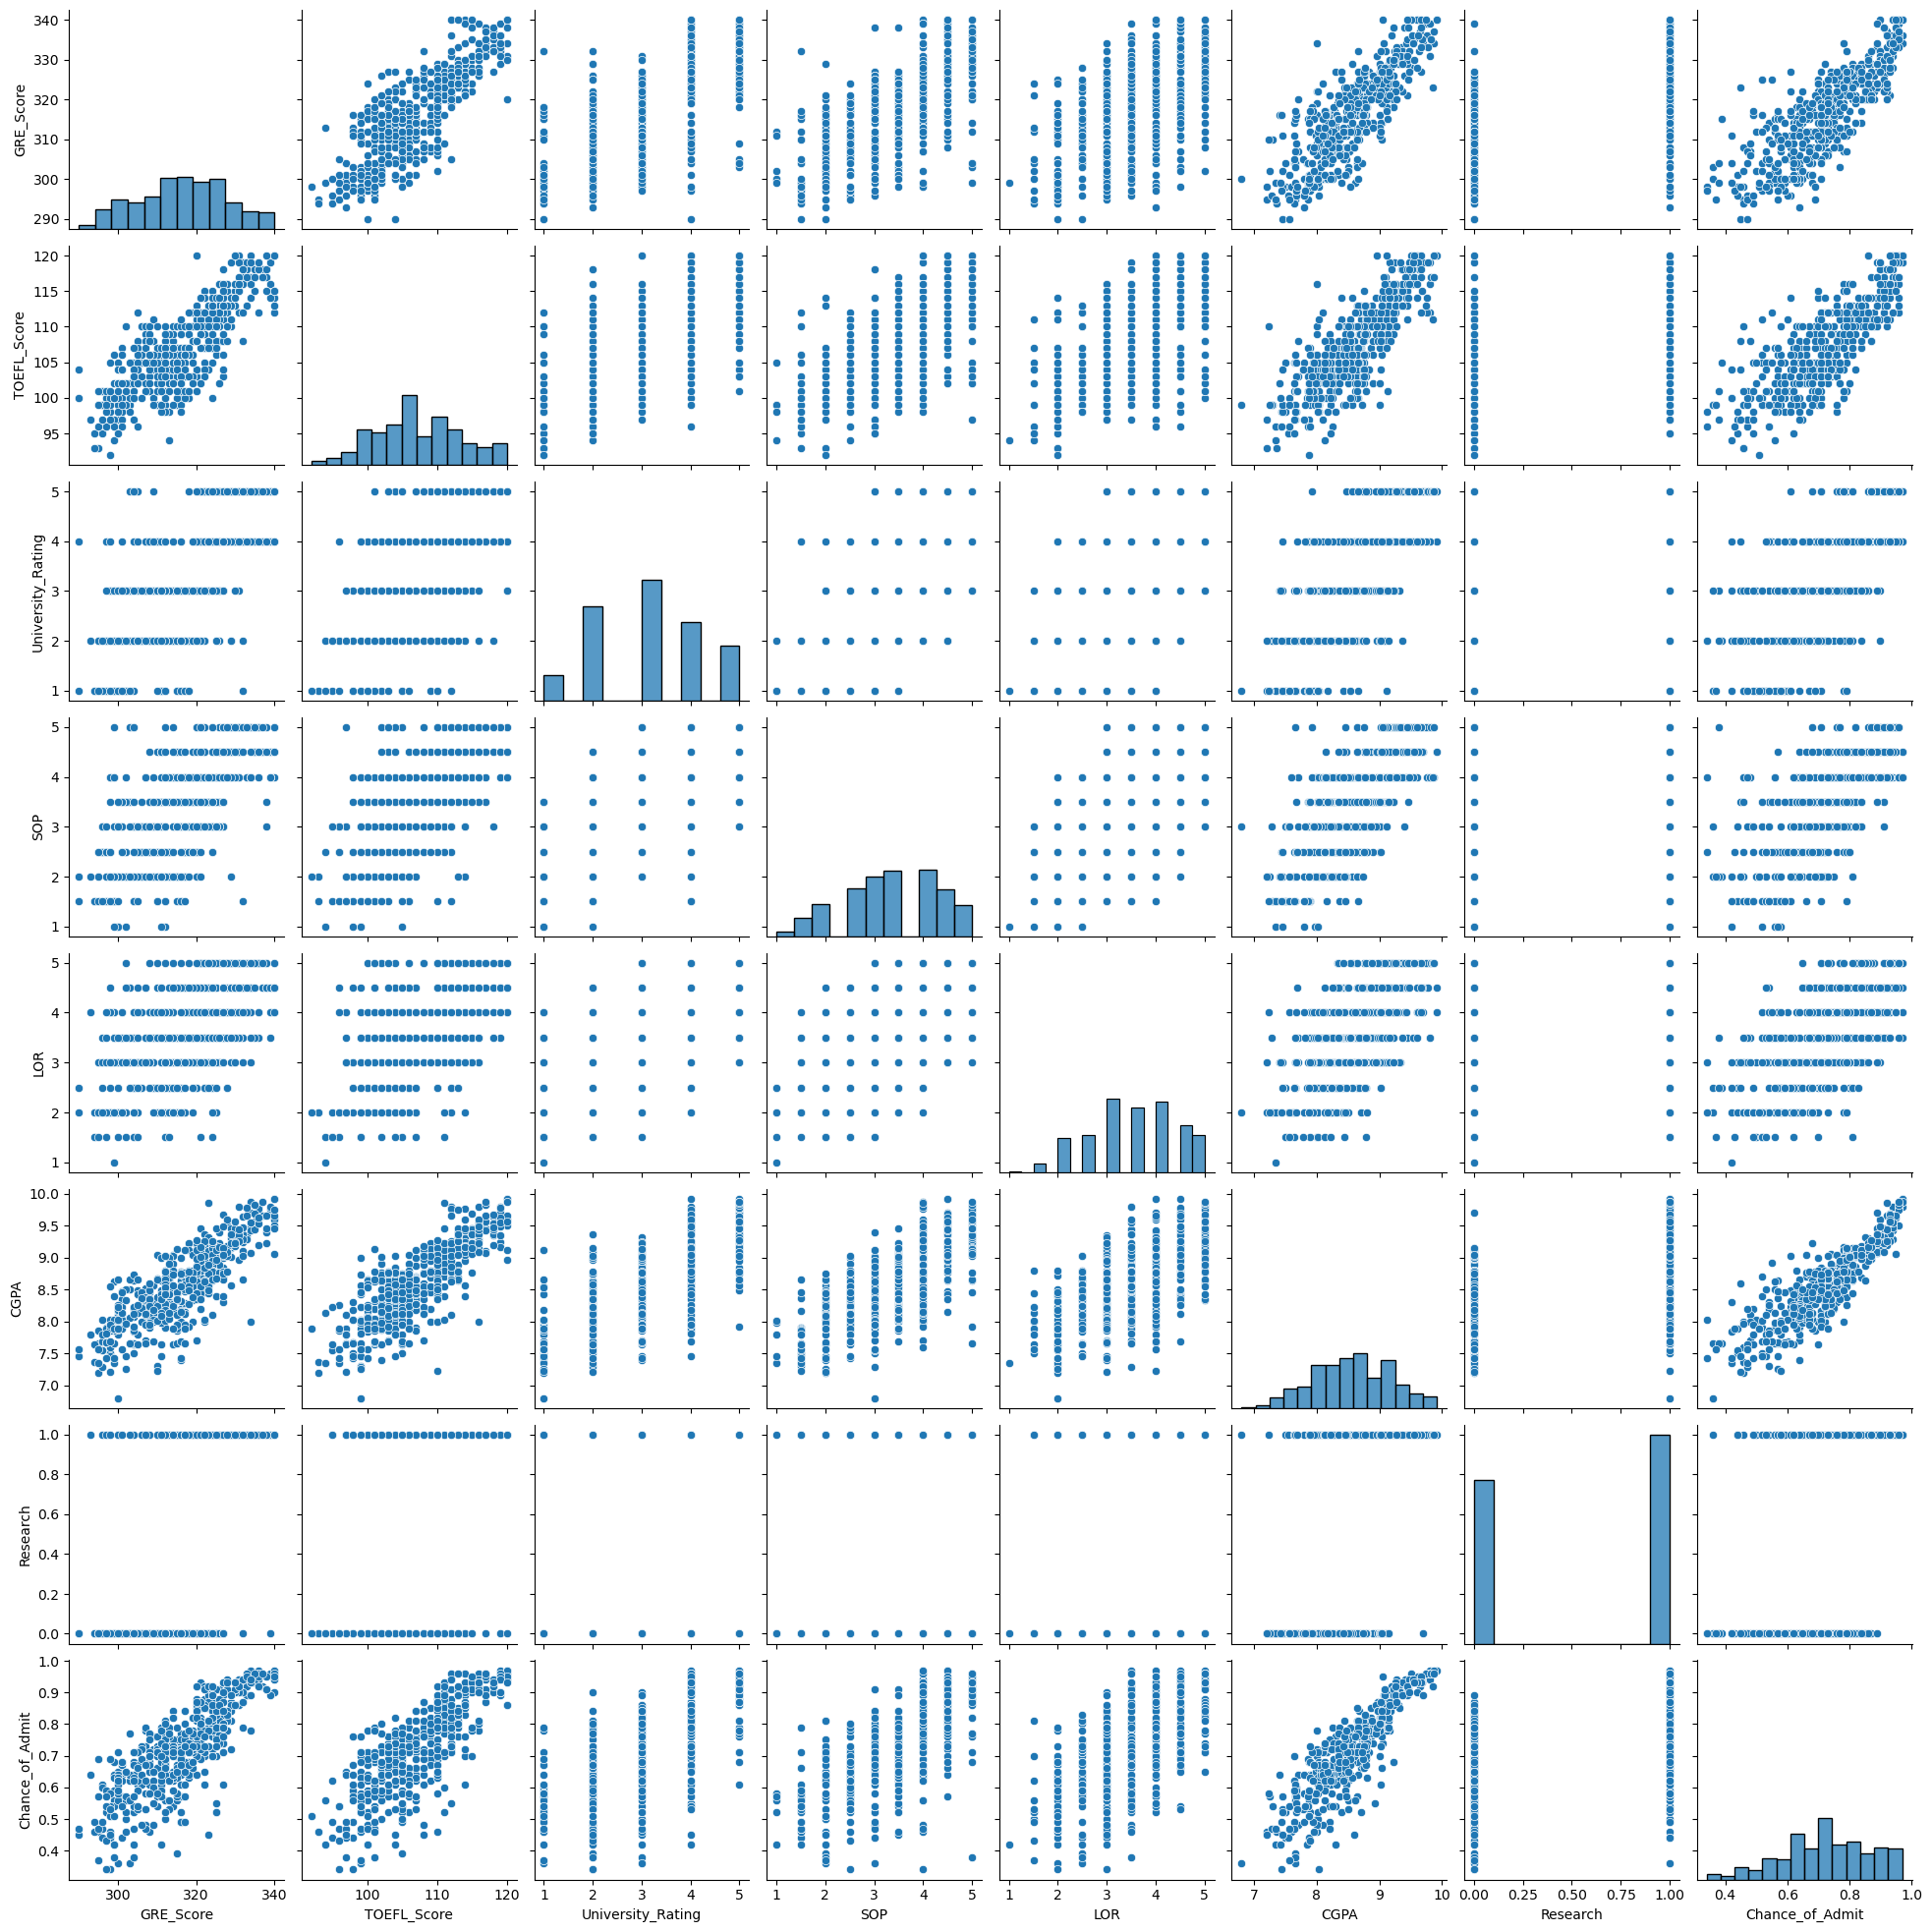

In [72]:
sns.pairplot(df)
plt.show()

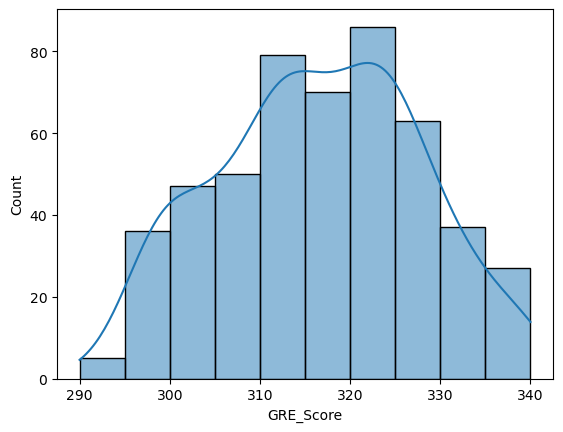

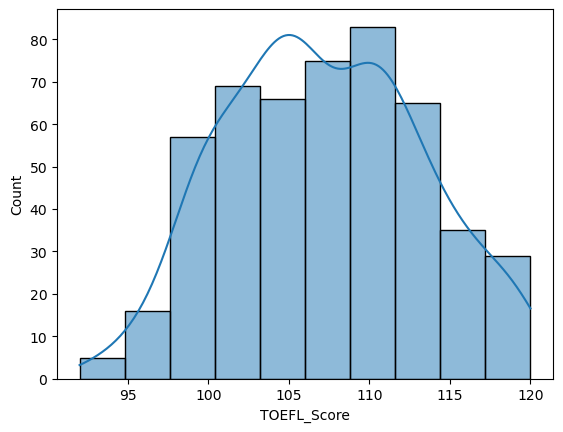

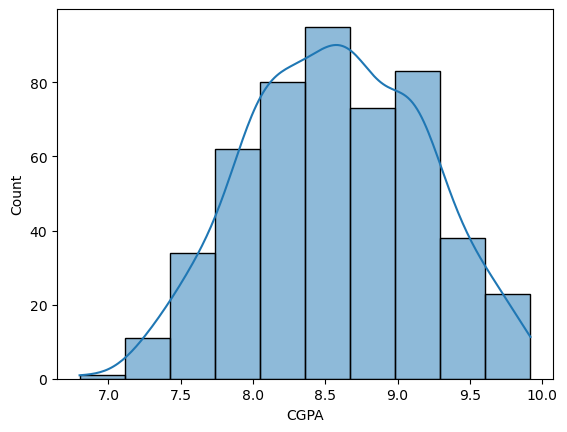

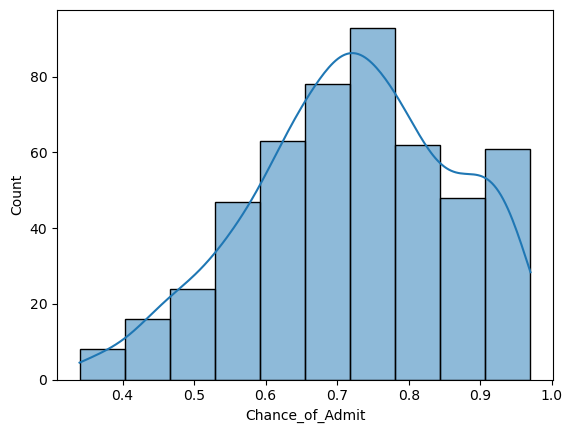

In [73]:
for i  in continous:
    sns.histplot( df[i], bins = 10, kde = True)
    plt.show()

In [74]:
df[continous].skew()

GRE_Score         -0.039842
TOEFL_Score        0.095601
CGPA              -0.026613
Chance_of_Admit   -0.289966
dtype: float64

- Data not contain skewness means its normally distributed

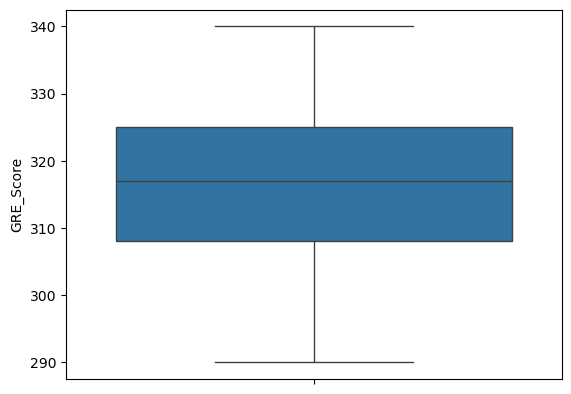

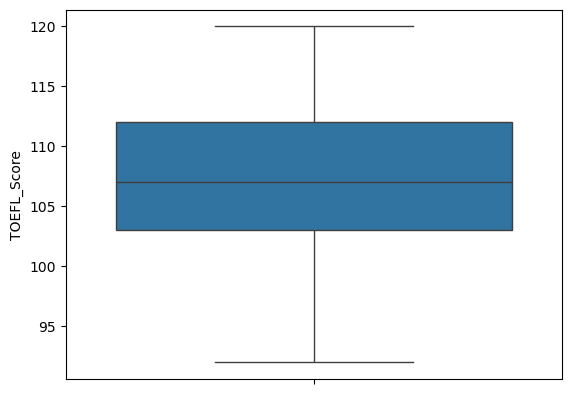

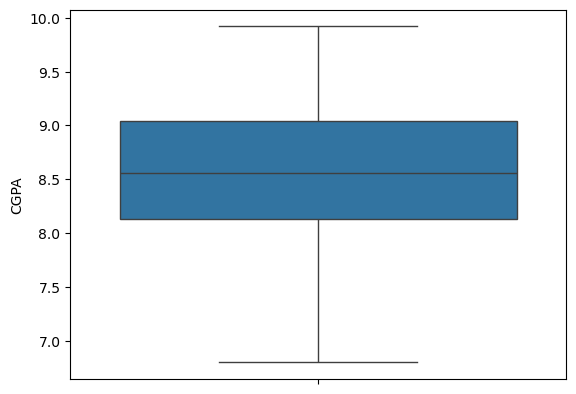

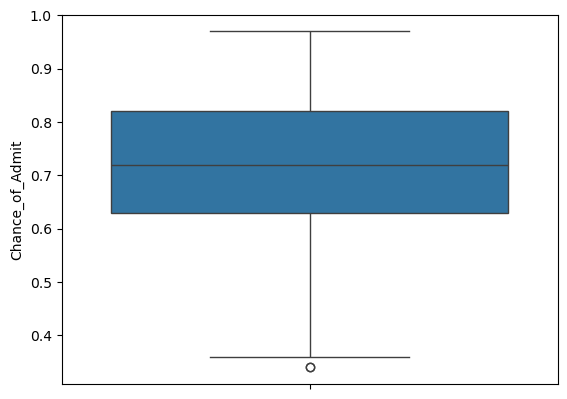

In [75]:
for i in continous:
    sns.boxplot(df[i])
    plt.show()

- No Outliers present in the dataset

In [76]:
for i in df:
    print(i , ': ', df[(df[i] < df[i].min()) | (df[i] > df[i].max())])
    print("=============================================")

GRE_Score :  Empty DataFrame
Columns: [GRE_Score, TOEFL_Score, University_Rating, SOP, LOR, CGPA, Research, Chance_of_Admit]
Index: []
TOEFL_Score :  Empty DataFrame
Columns: [GRE_Score, TOEFL_Score, University_Rating, SOP, LOR, CGPA, Research, Chance_of_Admit]
Index: []
University_Rating :  Empty DataFrame
Columns: [GRE_Score, TOEFL_Score, University_Rating, SOP, LOR, CGPA, Research, Chance_of_Admit]
Index: []
SOP :  Empty DataFrame
Columns: [GRE_Score, TOEFL_Score, University_Rating, SOP, LOR, CGPA, Research, Chance_of_Admit]
Index: []
LOR :  Empty DataFrame
Columns: [GRE_Score, TOEFL_Score, University_Rating, SOP, LOR, CGPA, Research, Chance_of_Admit]
Index: []
CGPA :  Empty DataFrame
Columns: [GRE_Score, TOEFL_Score, University_Rating, SOP, LOR, CGPA, Research, Chance_of_Admit]
Index: []
Research :  Empty DataFrame
Columns: [GRE_Score, TOEFL_Score, University_Rating, SOP, LOR, CGPA, Research, Chance_of_Admit]
Index: []
Chance_of_Admit :  Empty DataFrame
Columns: [GRE_Score, TOEFL_S

- No column will contain invalid value

# check for missing values

In [78]:
df.isnull().sum()

GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

**Observation**

-  All values are given in the range
- no null values in the dataet
- All columns are in correct syntax

- **This dataset is no required data preprocessing**
- **no need of data cleaning**
- **No need of Data Wrangling**
- **No need for feature engineering**
- **No need of transformation**
- **Data is already cleaned and well set**


In [92]:
df.duplicated().sum()

0

- No duplicates present in the dataset

# Check colinearity of this data

In [80]:
df[continous].corr()

,GRE_Score,TOEFL_Score,CGPA,Chance_of_Admit
GRE_Score,1.000000,0.827200,0.825878,0.810351
TOEFL_Score,0.827200,1.000000,0.810574,0.792228
CGPA,0.825878,0.810574,1.000000,0.882413
Chance_of_Admit,0.810351,0.792228,0.882413,1.000000


<Axes: >

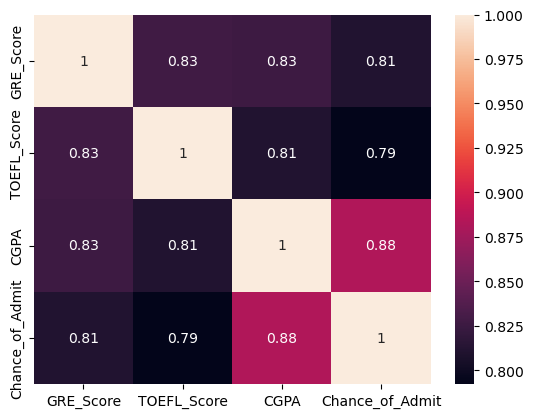

In [81]:
sns.heatmap(df[continous].corr(), annot = True)

-  All columns are highly correlated to output column so no need to do filter method

# VIF checking


In [90]:
import statsmodels.formula.api as smf

rsq_GRE_Score	= smf.ols("GRE_Score~TOEFL_Score+CGPA", data=df).fit().rsquared
vif_GRE_Score = 1/(1-rsq_GRE_Score)

rsq_TOEFL_Score	= smf.ols("TOEFL_Score~GRE_Score+CGPA", data=df).fit().rsquared
vif_TOEFL_Score = 1/(1-rsq_TOEFL_Score)

rsq_CGPA	= smf.ols("CGPA~TOEFL_Score+GRE_Score", data=df).fit().rsquared
vif_CGPA = 1/(1-rsq_CGPA)

# Storing vif values in a data frame
d1 = {"Variables" : ['GRE_Score', 'TOEFL_Score', 'CGPA'], 
    'VIF' : [vif_GRE_Score, vif_TOEFL_Score, vif_CGPA]}
vif_frame = pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,GRE_Score,4.075746
1,TOEFL_Score,3.778121
2,CGPA,3.752142


**Observation**
- All VIF values are below 5, indicating low to moderate collinearity between the continuous variables.
- Since none of the variables have a VIF greater than 4, there is no need to drop any columns from the model. The collinearity between these variables is not high enough to cause issues in regression analysis.

# checking for Best random state number

In [98]:
X = df.drop(columns = ['Chance_of_Admit'])
y = df['Chance_of_Admit']

In [103]:
Train = []
CV = []

for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = i)


    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(X_train, y_train)

    ypred_train = model.predict(X_train)

    from sklearn.metrics import r2_score
    Train.append(r2_score(y_train, ypred_train))

    from sklearn.model_selection import cross_val_score
    CV.append(cross_val_score(model, X_train, y_train, cv = 5).mean())

em = pd.DataFrame({"Train" : Train, "CV" : CV})
gm = em[abs(em["Train"] - em["CV"]) <= 0.05]
rs = gm[gm["CV"] == gm["CV"].max()].index.tolist()[0]
print("Best Random State number is : ", rs)

Best Random State number is :  8


**Best Random State number is :  8**


# save the cleaned data

In [104]:
df.to_csv('cleaned_dataset_admission_predict.csv', index=False)

In [105]:
pwd

'E:\\Data Science by SRK\\Machine_learning\\project\\University admission'